In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import os
import re
import pandas as pd
import copy
from sklearn.metrics import confusion_matrix as cm
from torchvision import datasets, transforms
import torchvision.datasets as datasets
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader,RandomSampler
import torch.nn.init as init

# Naive Bayes

In [2]:
# read data
dataset_path = "data"

def read_text_file(filepath: str) -> str:
    with open(filepath, 'r') as file:
        text_content = file.read()
    text_content = re.sub('[^a-zA-Z ]', '', text_content)
    return text_content

X_train = [] 
y_train = [] 
labels = ['e', 'j', 's']

for language in labels:
    for index in range(10):
        file_path = os.path.join(dataset_path, language + str(index) + '.txt')
        X_train.append(read_text_file(file_path))
        y_train.append(language)

In [3]:
def add_smooth(i, fre_vec, alpha = 0.5):
    return (fre_vec[i] + alpha) / (sum(fre_vec) + len(fre_vec) * alpha)

## 2.1

In [4]:
label_count = np.array([0,0,0])
for i in range(len(label_count)):
    label_count[i] = y_train.count(labels[i])

# Initialize prior
label_prior = np.array([1/3, 1/3, 1/3])
for i in range(len(label_count)):
    label_prior[i] = add_smooth(i, label_count)
    print(f"Prior of label {labels[i]}: {label_prior[i]}")

Prior of label e: 0.3333333333333333
Prior of label j: 0.3333333333333333
Prior of label s: 0.3333333333333333


##

In [5]:
# ccpe = [] # class conditional probability for english
character_dict = {
    "a":0,
    "b":1,
    "c":2,
    "d":3,
    "e":4,
    "f":5,
    "g":6,
    "h":7,
    "i":8,
    "j":9,
    "k":10,
    "l":11,
    "m":12,
    "n":13,
    "o":14,
    "p":15,
    "q":16,
    "r":17,
    "s":18,
    "t":19,
    "u":20,
    "v":21,
    "w":22,
    "x":23,
    "y":24,
    "z":25,
    " ":26
}
df_character_dict = pd.DataFrame({'Character':list(character_dict.keys()),
                                    'Dict':list(character_dict.values())}) 
e_label_count = np.zeros(27)
for i in np.where(np.array(y_train) == 'e')[0]:
    for j in range(len(X_train[i])):
        e_label_count[character_dict[X_train[i][j]]] += 1
    

e_character_prior = np.zeros(27)
for i in range(len(e_label_count)):
    e_character_prior[i] = add_smooth(i, e_label_count)
    e_character = df_character_dict.Character[df_character_dict.Dict == i]
    print(f"English prior of character {e_character.to_string(index = True)}: {e_character_prior[i]}")


English prior of character 0    a: 0.0601685114819098
English prior of character 1    b: 0.011134974392863043
English prior of character 2    c: 0.021509995043779945
English prior of character 3    d: 0.021972575582355856
English prior of character 4    e: 0.1053692383941847
English prior of character 5    f: 0.018932760614571286
English prior of character 6    g: 0.017478936064761277
English prior of character 7    h: 0.047216256401784236
English prior of character 8    i: 0.055410540227986124
English prior of character 9    j: 0.001420783082768875
English prior of character 10    k: 0.0037336857756484387
English prior of character 11    l: 0.028977366595076822
English prior of character 12    m: 0.020518751032545846
English prior of character 13    n: 0.057921691723112505
English prior of character 14    o: 0.06446390219725756
English prior of character 15    p: 0.01675202378985627
English prior of character 16    q: 0.0005617049396993227
English prior of character 17    r: 0.0538245

##

In [6]:
j_label_count = np.zeros(27)
for i in np.where(np.array(y_train) == 'j')[0]:
    for j in range(len(X_train[i])):
        j_label_count[character_dict[X_train[i][j]]] += 1
    

j_character_prior = np.zeros(27)
for i in range(len(j_label_count)):
    j_character_prior[i] = add_smooth(i, j_label_count)
    j_character = df_character_dict.Character[df_character_dict.Dict == i]
    print(f"Japanese prior of character {j_character.to_string(index = True)}: {j_character_prior[i]}")

Japanese prior of character 0    a: 0.1317656102589189
Japanese prior of character 1    b: 0.010866906600510151
Japanese prior of character 2    c: 0.005485866033054963
Japanese prior of character 3    d: 0.01722631818022992
Japanese prior of character 4    e: 0.06020475907613823
Japanese prior of character 5    f: 0.003878542227191726
Japanese prior of character 6    g: 0.014011670568503443
Japanese prior of character 7    h: 0.03176211607673224
Japanese prior of character 8    i: 0.09703343932352633
Japanese prior of character 9    j: 0.0023411020650616725
Japanese prior of character 10    k: 0.05740941332681086
Japanese prior of character 11    l: 0.001432614696530277
Japanese prior of character 12    m: 0.03979873510604843
Japanese prior of character 13    n: 0.05671057688947902
Japanese prior of character 14    o: 0.09116321324993885
Japanese prior of character 15    p: 0.0008735455466648031
Japanese prior of character 16    q: 0.00010482546559977637
Japanese prior of character 17

In [7]:
s_label_count = np.zeros(27)
for i in np.where(np.array(y_train) == 's')[0]:
    for j in range(len(X_train[i])):
        s_label_count[character_dict[X_train[i][j]]] += 1
    

s_character_prior = np.zeros(27)
for i in range(len(s_label_count)):
    s_character_prior[i] = add_smooth(i, s_label_count)
    s_character = df_character_dict.Character[df_character_dict.Dict == i]
    print(f"Spanish prior of character {s_character.to_string(index = True)}: {s_character_prior[i]}")

Spanish prior of character 0    a: 0.10456045141993771
Spanish prior of character 1    b: 0.008232863618143134
Spanish prior of character 2    c: 0.03752582405722919
Spanish prior of character 3    d: 0.039745922111559924
Spanish prior of character 4    e: 0.1138108599796491
Spanish prior of character 5    f: 0.00860287996053159
Spanish prior of character 6    g: 0.0071844839813758445
Spanish prior of character 7    h: 0.0045327001942585795
Spanish prior of character 8    i: 0.049859702136844375
Spanish prior of character 9    j: 0.006629459467793161
Spanish prior of character 10    k: 0.0002775122567913416
Spanish prior of character 11    l: 0.052943171656748174
Spanish prior of character 12    m: 0.02580863988159477
Spanish prior of character 13    n: 0.054176559464709693
Spanish prior of character 14    o: 0.07249236841293824
Spanish prior of character 15    p: 0.02426690512164287
Spanish prior of character 16    q: 0.007677839104560451
Spanish prior of character 17    r: 0.05929511

##

In [8]:
X_e_test = []
file_path = os.path.join(dataset_path, "e" + str(10) + '.txt')
X_e_test = (read_text_file(file_path))

e10_count = np.zeros(27)
for character in X_e_test:
    e10_count[character_dict[character]] += 1

e10_count = np.array(e10_count)
print(e10_count)

[164.  32.  53.  57. 311.  55.  51. 140. 140.   3.   6.  85.  64. 139.
 182.  53.   3. 141. 186. 225.  65.  31.  47.   4.  38.   2. 498.]


## 

In [9]:
character_prior = [e_character_prior, j_character_prior, s_character_prior]
prob = []
for i in range(3):
    logprob = 0
    for j in range(27):
        logprob += e10_count[j] * np.log(character_prior[i][j])
    prob.append(logprob)
print(prob)

[-7841.865447060635, -8771.433079075032, -8467.282044010557]


##

In [10]:
pre_x = labels[np.argmax(prob)]
print(f"\n Predicted label of x : {pre_x}")
# print("best label estimate is " + langs[MAP_idx] + " with probability " + str(MAP_val))


 Predicted label of x : e


##

In [11]:
X_test = []
y_test = []
for language in labels:
    for index in range(10, 20):
        file_path = os.path.join(dataset_path, language + str(index) + '.txt')
        X_test.append(read_text_file(file_path))
        y_test.append(language)
        
test_count = np.zeros((30,27))
for i in range(len(X_test)):
    for character in X_test[i]:
        test_count[i][character_dict[character]] += 1

prob = np.zeros((30,3))
for k in range(len(X_test)):
    for i in range(3):
        logprob = 0
        for j in range(27):
            logprob += test_count[k][j] * np.log(character_prior[i][j])
        prob[k][i] = logprob

y_test_pred = []
# since the prior is equal, just use likelihood
for i in range(len(X_test)):
    y_test_pred.append(labels[np.argmax(prob[i])])

# Confusion matrix
cm(y_test, y_test_pred)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

# Network

In [2]:
# Hyperparameters
# Input dimension (MNIST images are 28x28 = 784)
d = 784  
d1 = 300
# 10 Classes
k = 10 

alpha = 0.04
batch = 32
epochs = 15

In [3]:
# the transformer which can convert images to tensors
transform = transforms.Compose([transforms.ToTensor()])

# Load the MNIST datasets with transformations
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Loaders with transformed data
train_loader = DataLoader(mnist_trainset, batch_size=batch, shuffle=True)
test_loader = DataLoader(mnist_testset, batch_size=batch, shuffle=False)

# Maybe enhance the calculation efficiency 
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## Using Numpy to write a NN

In [14]:
# Define the CrossEntropyLoss function
def cross_entropy_loss(outputs, labels):

    log_likelihood = -np.log(outputs[range(labels.shape[0]), labels])
    loss = np.sum(log_likelihood)
    return loss

class Numpy_NN:
    def __init__(self, d, d1, k):
        # initialize the weights
        self.weights1 = np.random.uniform(-1, 1, (d, d1))
        self.weights2 = np.random.uniform(-1, 1, (d1, k))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

    def forward(self, x):
        self.z1 = np.dot(x, self.weights1)
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights2)
        self.a2 = self.softmax(self.z2)
        return self.a2

    def backward(self, x, y):
        dz2 = self.a2 - np.eye(self.a2.shape[1])[y]  # Convert labels to one-hot encoding
        dw2 = np.dot(self.a1.T, dz2) / x.shape[0] # outer
        dz1 = np.dot(dz2, self.weights2.T) * self.a1 * (1 - self.a1)
        dw1 = np.dot(x.T, dz1) / x.shape[0] # outer
        return dw1, dw2

    def update_parameters(self, dw1, dw2, step_size):
        self.weights1 -= step_size * dw1
        self.weights2 -= step_size * dw2

In [17]:
def numpy_train_nn(network, input_dim = d, hidden_dim = d1, output_dim = k, 
                   step_size = alpha, iteration = epochs, 
                   train_data = train_loader, test_data = test_loader):

    # Initialize model, loss function, and optimizer
    model = network(input_dim, hidden_dim, output_dim)

    # Start training and collect metrics
    train_losses = [] 
    epochs_list = []
    train_accuracies = []
    test_accuracies = []
    
    sampler = RandomSampler(mnist_trainset, replacement=True)
    train_loader = DataLoader(mnist_trainset, batch_size=batch, sampler=sampler)

    for epoch in range(iteration):
        total_loss = 0
        correct_train = 0
        total_train = 0

        for images, labels in train_loader:
            # Flatten the input images
            images = images.view(-1, d).numpy()  
            labels = labels.numpy()

            outputs = model.forward(images)
            loss = cross_entropy_loss(outputs, labels)

            dw1, dw2 = model.backward(images, labels)

            model.update_parameters(dw1, dw2, step_size)

            total_loss += loss

            predicted = np.argmax(outputs, axis=1)
            total_train += labels.shape[0]
            correct_train += np.sum(predicted == labels)

        avg_loss = total_loss
        train_losses.append(avg_loss)
        train_accuracy = correct_train / total_train
        train_accuracies.append(train_accuracy)

        # Calculate test accuracy
        correct_test = 0
        total_test = 0

        for images, labels in test_data:
            images = images.view(-1, d).numpy()
            labels = labels.numpy()
            outputs = model.forward(images)
            predicted = np.argmax(outputs, axis=1)
            total_test += labels.shape[0]
            correct_test += np.sum(predicted == labels)

        test_accuracy = correct_test / total_test
        test_accuracies.append(test_accuracy)
        print(f'{epoch + 1}, Loss: {avg_loss}, Train: {train_accuracy}, Test: {test_accuracy}')
    return train_accuracies, test_accuracies


In [18]:
numpy_nn = numpy_train_nn(Numpy_NN)

1, Loss: 55594.29262611871, Train: 0.7619166666666667, Test: 0.8639
2, Loss: 25296.522822950184, Train: 0.8764666666666666, Test: 0.8931
3, Loss: 20263.036746990303, Train: 0.9014166666666666, Test: 0.9093
4, Loss: 17425.71739829235, Train: 0.9145666666666666, Test: 0.9168
5, Loss: 15646.088318995, Train: 0.9229333333333334, Test: 0.9204
6, Loss: 14120.4486287753, Train: 0.9306333333333333, Test: 0.9256
7, Loss: 12953.451794065513, Train: 0.9359166666666666, Test: 0.9295
8, Loss: 12525.125592886337, Train: 0.9379666666666666, Test: 0.9323
9, Loss: 11793.537334479313, Train: 0.9427, Test: 0.9343
10, Loss: 11114.084948408943, Train: 0.9454, Test: 0.936
11, Loss: 10469.304331061869, Train: 0.9491166666666667, Test: 0.939
12, Loss: 9928.874301735705, Train: 0.9509666666666666, Test: 0.9407
13, Loss: 9479.735343224927, Train: 0.95145, Test: 0.9429
14, Loss: 8948.083087238854, Train: 0.9558, Test: 0.944
15, Loss: 8650.855122018982, Train: 0.9574333333333334, Test: 0.9449


In [19]:
train_acc_numpy, test_acc_numpy = numpy_nn
for i in range(epochs):
    print(f'{i + 1}, Test errors: {1-test_acc_numpy[i]}')

1, Test errors: 0.1361
2, Test errors: 0.1069
3, Test errors: 0.0907
4, Test errors: 0.08320000000000005
5, Test errors: 0.0796
6, Test errors: 0.07440000000000002
7, Test errors: 0.07050000000000001
8, Test errors: 0.06769999999999998
9, Test errors: 0.06569999999999998
10, Test errors: 0.06399999999999995
11, Test errors: 0.061000000000000054
12, Test errors: 0.05930000000000002
13, Test errors: 0.05710000000000004
14, Test errors: 0.05600000000000005
15, Test errors: 0.05510000000000004


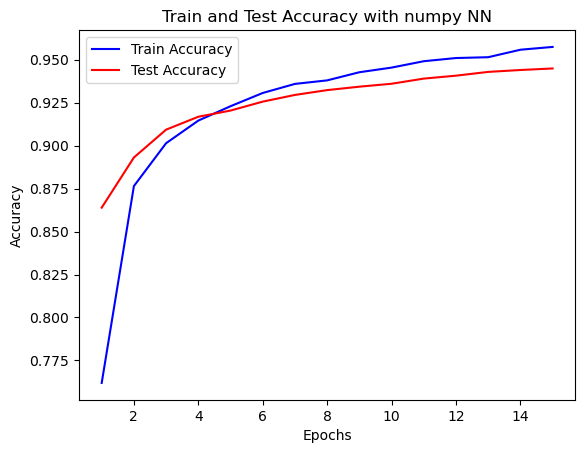

In [20]:
epochs_list = list(range(1, epochs + 1))
plt.plot(epochs_list, train_acc_numpy, label='Train Accuracy', color='blue')
plt.plot(epochs_list, test_acc_numpy, label='Test Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy with numpy NN')
plt.legend()
plt.savefig('problem 4-2.png')
plt.show()

##

In [10]:
# Define a neural network class
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.Sigmoid(),
            nn.Linear(hidden_dim, output_dim),
        )

    def forward(self, x):
        x = self.layers(x)
        return x

In [11]:
def train_nn(network, input_dim = d, hidden_dim = d1, output_dim = k, 
             step_size = alpha, iteration = epochs, test_data = test_loader):
    # Initialize model, loss function, and optimizer
    model = network(input_dim, hidden_dim, output_dim)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr = step_size)

    # Start training and collect metrics
    train_losses = [] 
    train_accuracies = []
    test_accuracies = []

    for epoch in range(iteration):
        total_loss = 0
        correct_train = 0
        total_train_samples = 0
        
        sampler = RandomSampler(mnist_trainset, replacement=True)
        train_loader = DataLoader(mnist_trainset, batch_size=batch, sampler=sampler)
        
        for images, labels in train_loader:
            optimizer.zero_grad()
            # Flatten the input images
            outputs = model(images.view(-1, input_dim))  
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_train_samples += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        average_loss = total_loss / len(train_loader)
        train_losses.append(average_loss)
        train_accuracy = correct_train / total_train_samples
        train_accuracies.append(train_accuracy)

        # Calculate test accuracy
        correct_test = 0
        total_test_samples = 0

        with torch.no_grad():
            for images, labels in test_data:
                outputs = model(images.view(-1, input_dim))
                _, predicted = torch.max(outputs.data, 1)
                total_test_samples += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        test_accuracy = correct_test / total_test_samples
        test_accuracies.append(test_accuracy)
        print(f'{epoch + 1}, Loss: {average_loss}, Train: {train_accuracy}, Test: {test_accuracy}')
    return train_accuracies, test_accuracies

In [12]:
torch_nn = train_nn(NeuralNetwork)

1, Loss: 0.9685476558287939, Train: 0.7404666666666667, Test: 0.8849
2, Loss: 0.39342759533723193, Train: 0.89005, Test: 0.9023
3, Loss: 0.33291438708702725, Train: 0.9056333333333333, Test: 0.9114
4, Loss: 0.31397462667624154, Train: 0.9100333333333334, Test: 0.916
5, Loss: 0.2911224812249343, Train: 0.9149666666666667, Test: 0.9219
6, Loss: 0.27833014677762985, Train: 0.91935, Test: 0.9229
7, Loss: 0.2724559858540694, Train: 0.9223166666666667, Test: 0.9241
8, Loss: 0.2630272361348073, Train: 0.9252666666666667, Test: 0.9262
9, Loss: 0.2485257745405038, Train: 0.92845, Test: 0.9294
10, Loss: 0.24215537589589756, Train: 0.9303166666666667, Test: 0.9327
11, Loss: 0.23535058984657128, Train: 0.9326333333333333, Test: 0.9346
12, Loss: 0.22800326154033343, Train: 0.9355833333333333, Test: 0.934
13, Loss: 0.21843373847504458, Train: 0.9374666666666667, Test: 0.9383
14, Loss: 0.20769246765077115, Train: 0.9419, Test: 0.9412
15, Loss: 0.20286516733268897, Train: 0.9416666666666667, Test: 0.9

In [13]:
train_acc, test_acc = torch_nn
for i in range(epochs):
    print(f'{i + 1}, Test errors: {1-test_acc[i]}')

1, Test errors: 0.11509999999999998
2, Test errors: 0.09770000000000001
3, Test errors: 0.08860000000000001
4, Test errors: 0.08399999999999996
5, Test errors: 0.07809999999999995
6, Test errors: 0.07709999999999995
7, Test errors: 0.07589999999999997
8, Test errors: 0.07379999999999998
9, Test errors: 0.0706
10, Test errors: 0.06730000000000003
11, Test errors: 0.06540000000000001
12, Test errors: 0.06599999999999995
13, Test errors: 0.06169999999999998
14, Test errors: 0.05879999999999996
15, Test errors: 0.05879999999999996


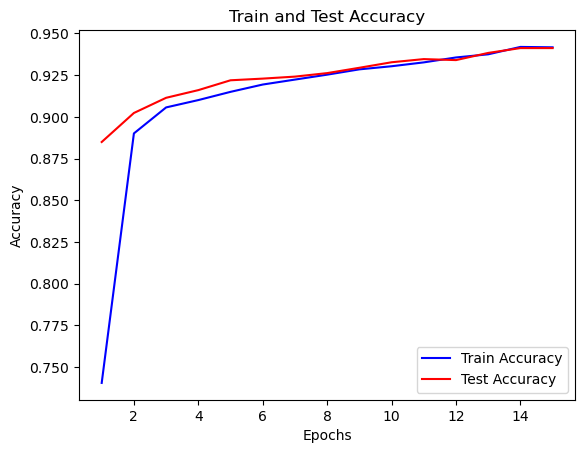

In [14]:
epochs_list = list(range(1, epochs + 1))
plt.plot(epochs_list, train_acc, label='Train Accuracy', color='blue')
plt.plot(epochs_list, test_acc, label='Test Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy')
plt.legend()
plt.savefig('problem 4-3.png')
plt.show()

##

In [15]:
class NeuralNetwork_0(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork_0, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.Sigmoid(),
            nn.Linear(hidden_dim, output_dim),
        )
        
        # Call the weight initialization function
        self.initialize_weights()

    def forward(self, x):
        x = self.layers(x)
        return x

    def initialize_weights(self):
        for layer in self.layers:
            if isinstance(layer, nn.Linear):
                # Initialize the weights to zeros
                init.zeros_(layer.weight)

In [16]:
torch_nn_0 = train_nn(NeuralNetwork_0)

1, Loss: 2.319909357961019, Train: 0.1054, Test: 0.1429
2, Loss: 1.7346762343406676, Train: 0.36236666666666667, Test: 0.6134
3, Loss: 0.7951438965479533, Train: 0.7433666666666666, Test: 0.819
4, Loss: 0.5040699436823527, Train: 0.8565166666666667, Test: 0.8819
5, Loss: 0.4028399612983068, Train: 0.8864666666666666, Test: 0.8971
6, Loss: 0.3581170582711697, Train: 0.8990833333333333, Test: 0.9046
7, Loss: 0.3372497861683369, Train: 0.9048, Test: 0.9088
8, Loss: 0.31888602197368937, Train: 0.9097333333333333, Test: 0.9156
9, Loss: 0.30258701277971267, Train: 0.9133333333333333, Test: 0.9183
10, Loss: 0.2967749779423078, Train: 0.9157166666666666, Test: 0.9186
11, Loss: 0.2838754151145617, Train: 0.9180166666666667, Test: 0.9204
12, Loss: 0.272808165209492, Train: 0.9223833333333333, Test: 0.9229
13, Loss: 0.272408130333821, Train: 0.9211, Test: 0.9264
14, Loss: 0.2570058427105347, Train: 0.92575, Test: 0.9259
15, Loss: 0.24972947974701723, Train: 0.9265, Test: 0.931


In [17]:
train_acc_0, test_acc_0 = torch_nn_0
for i in range(epochs):
    print(f'{i + 1}, Test errors: {1-test_acc_0[i]}')

1, Test errors: 0.8571
2, Test errors: 0.38660000000000005
3, Test errors: 0.18100000000000005
4, Test errors: 0.11809999999999998
5, Test errors: 0.10289999999999999
6, Test errors: 0.09540000000000004
7, Test errors: 0.09119999999999995
8, Test errors: 0.08440000000000003
9, Test errors: 0.0817
10, Test errors: 0.08140000000000003
11, Test errors: 0.0796
12, Test errors: 0.07709999999999995
13, Test errors: 0.0736
14, Test errors: 0.07410000000000005
15, Test errors: 0.06899999999999995


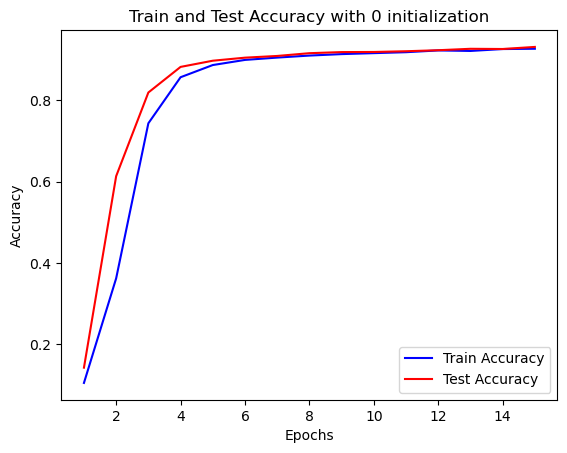

In [18]:
plt.plot(epochs_list, train_acc_0, label='Train Accuracy', color='blue')
plt.plot(epochs_list, test_acc_0, label='Test Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy with 0 initialization')
plt.legend()
plt.savefig('problem 4-4-1.png')
plt.show()

In [19]:
class NeuralNetwork_1(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork_1, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.Sigmoid(),
            nn.Linear(hidden_dim, output_dim),
        )
        
        # Call the weight initialization function
        self.initialize_weights()

    def forward(self, x):
        x = self.layers(x)
        return x

    def initialize_weights(self):            
        for layer in self.layers:
            if isinstance(layer, nn.Linear):
                # Initialize the weights to uniform -1,1
                init.uniform_(layer.weight, -1, 1)

In [20]:
torch_nn_1 = train_nn(NeuralNetwork_1)

1, Loss: 0.9151165804664294, Train: 0.7538, Test: 0.8563
2, Loss: 0.4249521202564239, Train: 0.8761166666666667, Test: 0.8908
3, Loss: 0.3476048279921214, Train: 0.8963666666666666, Test: 0.9024
4, Loss: 0.29945708747208116, Train: 0.9115, Test: 0.9104
5, Loss: 0.2665322231248021, Train: 0.9226, Test: 0.9157
6, Loss: 0.2413769487058123, Train: 0.9286666666666666, Test: 0.9235
7, Loss: 0.22095918229172626, Train: 0.9353833333333333, Test: 0.9261
8, Loss: 0.2057234000419577, Train: 0.9399333333333333, Test: 0.9301
9, Loss: 0.19284955530166625, Train: 0.9430666666666667, Test: 0.9331
10, Loss: 0.18480788306444884, Train: 0.94655, Test: 0.9338
11, Loss: 0.17324286667307218, Train: 0.9488, Test: 0.9378
12, Loss: 0.1697911851465702, Train: 0.9506, Test: 0.9387
13, Loss: 0.1601016299461325, Train: 0.9530666666666666, Test: 0.9416
14, Loss: 0.15668635834107797, Train: 0.95495, Test: 0.9432
15, Loss: 0.14865734889035423, Train: 0.9578666666666666, Test: 0.9433


In [21]:
train_acc_1, test_acc_1 = torch_nn_1
for i in range(epochs):
    print(f'{i + 1}, Test errors: {1-test_acc_1[i]}')

1, Test errors: 0.14370000000000005
2, Test errors: 0.10919999999999996
3, Test errors: 0.09760000000000002
4, Test errors: 0.08960000000000001
5, Test errors: 0.08430000000000004
6, Test errors: 0.07650000000000001
7, Test errors: 0.07389999999999997
8, Test errors: 0.06989999999999996
9, Test errors: 0.06689999999999996
10, Test errors: 0.06620000000000004
11, Test errors: 0.06220000000000003
12, Test errors: 0.06130000000000002
13, Test errors: 0.05840000000000001
14, Test errors: 0.05679999999999996
15, Test errors: 0.05669999999999997


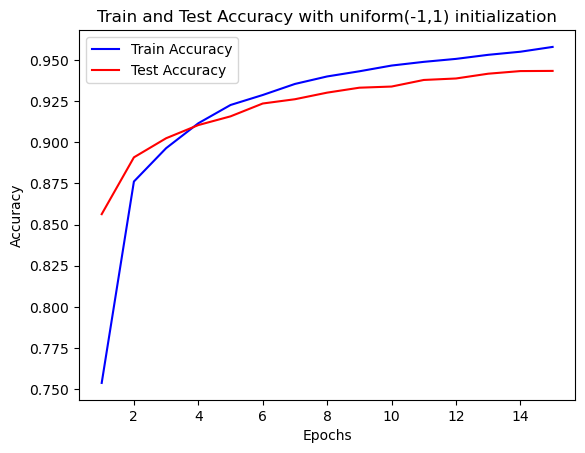

In [22]:
plt.plot(epochs_list, train_acc_1, label='Train Accuracy', color='blue')
plt.plot(epochs_list, test_acc_1, label='Test Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy with uniform(-1,1) initialization')
plt.legend()
plt.savefig('problem 4-4-2.png')
plt.show()

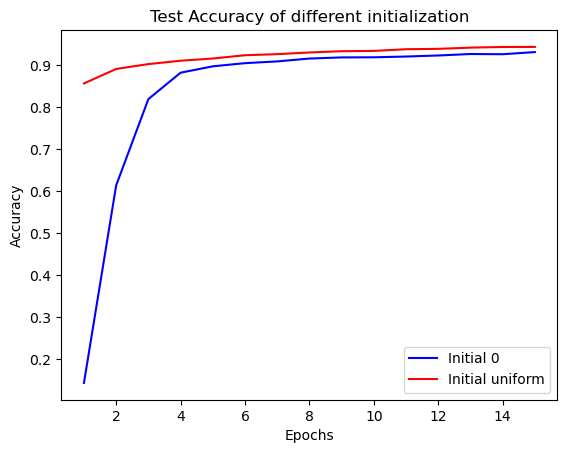

In [23]:
plt.plot(epochs_list, test_acc_0, label='Initial 0', color='blue')
plt.plot(epochs_list, test_acc_1, label='Initial uniform', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy of different initialization')
plt.legend()
plt.savefig('problem 4-4-3.png')
plt.show()